In [35]:
import pandas as pd

#results_milestones_oct24 = './data/Milestones - timesStandard-prod-Oct24.csv'
results_milestones_nov24 = './data/Milestones - timesStandard-prod-Nov24.csv'
df = pd.read_csv(results_milestones_nov24)
# We will now focus on the specific columns for the milestones
df.drop(df[df['Participant'] == 'ap3535@nau.edu'].index, inplace = True)
df


,PX,Participant,start,group,issue,problem,folder,file,class,method,...,sound solution,alternative answer,Gift card requested,Gift card received,group.1,issue_number,Control YOE,Control Contribs,Alt YOE,Alt Contrib
0,P0,ItaloSantos,2:35 PM,Control,17,17,18.0,18.0,19.0,21.0,...,n,n,y,y,Control,5679,4.0,0.0,NaN,NaN
1,P1,FelipeFelixSantos@gmail.com,10:15 AM,Treatment,2,3,44.0,45.0,45.0,46.0,...,y,n,y,y,Treatment,5485,NaN,NaN,7.0,0.0
2,P2,gk325@nau.edu,3:09:00 PM,Treatment,1,6,56.0,56.0,58.0,NaN,...,n,n,y,y,Treatment,4612,3.0,0.0,NaN,NaN
3,P3,sb3292@nau.edu,4:21:00 PM,Treatment,3,19,23.0,23.0,23.0,27.0,...,y,n,y,y,Treatment,5194,NaN,NaN,9.0,9.0
4,P4,gummadisk99@gmail.com,1:20 PM,Control,4,14,38.0,38.0,38.0,41.0,...,n,n,y,y,Control,4612,1.0,1.0,NaN,NaN
5,P5,hk486@nau.edu,3:22 PM,Treatment,20,25,31.0,31.0,31.0,32.0,...,y,n,y,y,Treatment,5069,NaN,NaN,4.0,2.0
7,P6,kv582@nau.edu,12:44 PM,Control,11,19,NaN,NaN,NaN,NaN,...,n,n,y,y,Control,5485,1.0,1.0,NaN,NaN
8,P7,vg588@nau.edu,4:34 PM,Treatment,5,25,35.0,35.0,35.0,37.0,...,y,n,y,y,Treatment,5485,NaN,NaN,2.0,0.0
9,P8,ma3932@nau.edu,4:13 PM,Treatment,7,33,43.0,43.0,43.0,43.0,...,y,n,y,y,Treatment,5485,NaN,NaN,5.0,1.0
10,P9,"nk545@nau,edu",3:14 PM,Control,7,22,25.0,25.0,37.0,46.0,...,y,n,y,y,Control,5069,2.0,2.0,NaN,NaN


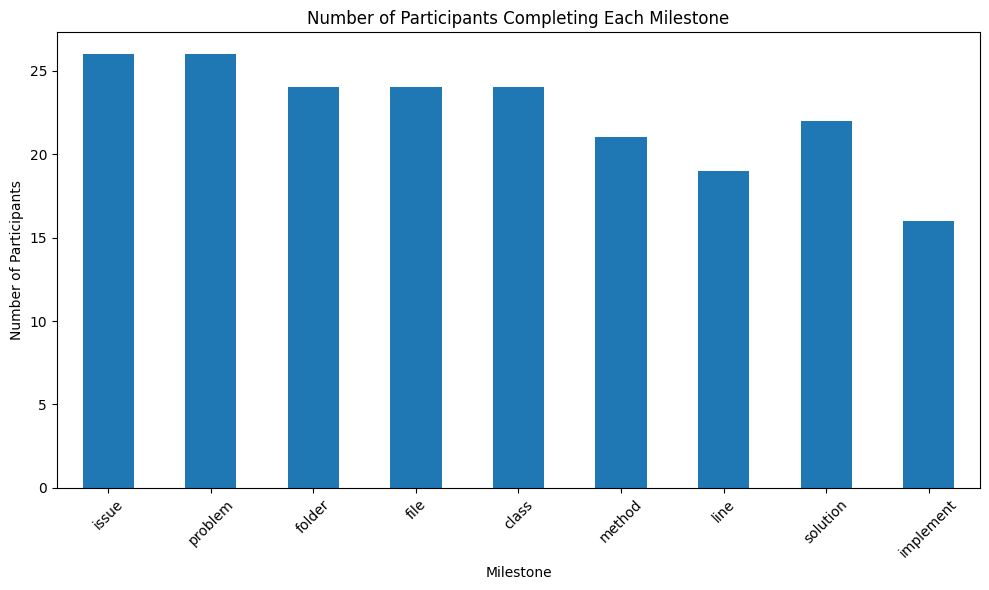

In [36]:
milestone_columns = ['issue', 'problem', 'folder', 'file', 'class', 'method', 'line', 'solution', 'implement']

# Calculate the number of participants that completed each milestone
milestone_counts = df[milestone_columns].notna().sum()

# Plotting the bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
milestone_counts.plot(kind='bar')
plt.title('Number of Participants Completing Each Milestone')
plt.xlabel('Milestone')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

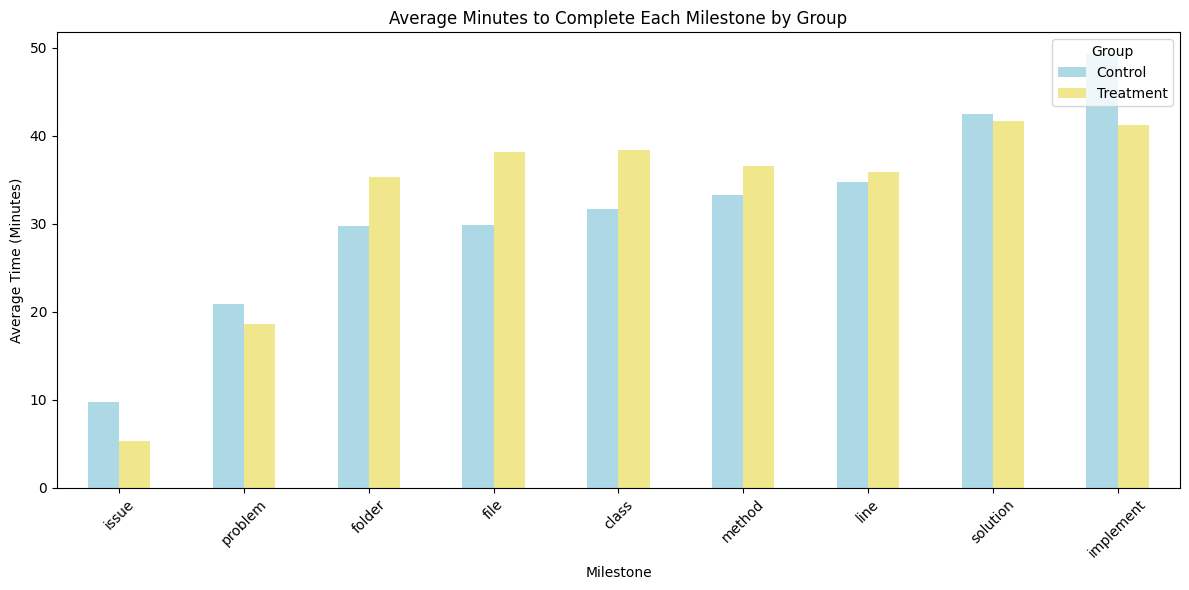

In [37]:
# Convert the relevant columns to numeric, ensuring to handle errors in case of NaN values
df[milestone_columns] = df[milestone_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the average time (in minutes) it took participants to complete each milestone, divided by group
grouped_avg_time = df.groupby('group')[milestone_columns].mean()

colors = ['lightblue', 'khaki']
# Plot the average minutes to complete milestones by group
grouped_avg_time.T.plot(kind='bar', figsize=(12, 6), color=colors)

plt.title('Average Minutes to Complete Each Milestone by Group')
plt.xlabel('Milestone')
plt.ylabel('Average Time (Minutes)')
plt.xticks(rotation=45)
plt.legend(title='Group', loc='upper right')
plt.tight_layout()
plt.savefig('average_minutes_by_group.png', format='png')
plt.savefig('average_minutes_by_group.pdf', format='pdf')
# Show the plot
plt.show()


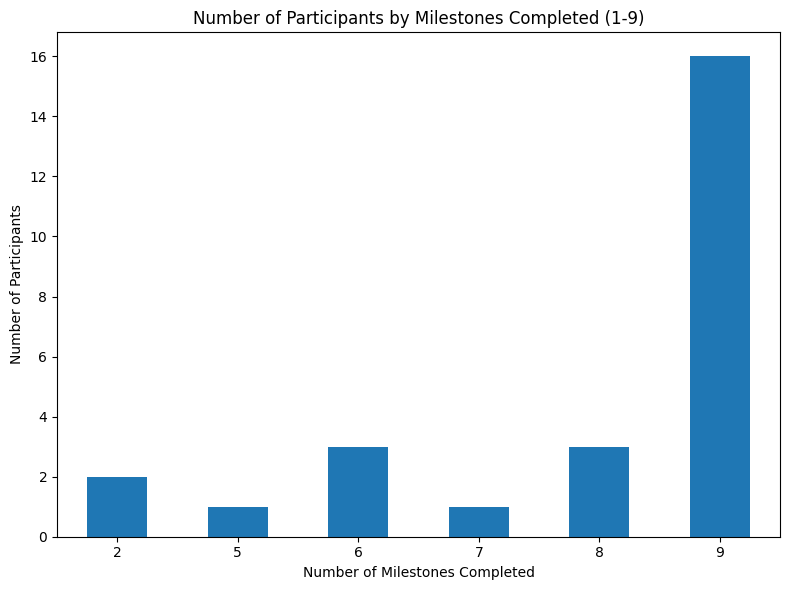

In [38]:
# Count the number of milestones completed by each participant (ignoring NaN values)
milestones_completed = df[milestone_columns].notna().sum(axis=1)

# Count how many participants completed each possible number of milestones (from 1 to 9)
milestones_distribution = milestones_completed.value_counts().sort_index()

# Plot the distribution of participants by the number of milestones completed
plt.figure(figsize=(8, 6))
milestones_distribution.plot(kind='bar')
plt.title('Number of Participants by Milestones Completed (1-9)')
plt.xlabel('Number of Milestones Completed')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


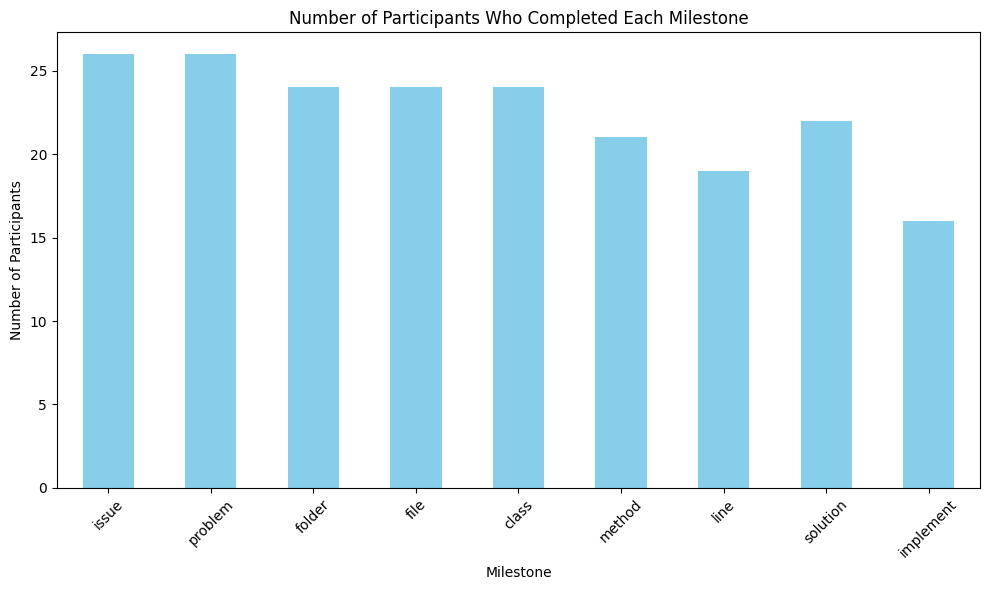

In [39]:
import matplotlib.pyplot as plt

# Count the number of participants who completed each milestone (ignoring NaN values)
completed_counts = df[milestone_columns].notna().sum()

# Create a bar plot to visualize the number of participants who completed each milestone
plt.figure(figsize=(10, 6))
completed_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Participants Who Completed Each Milestone')
plt.xlabel('Milestone')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as PNG and PDF
plt.savefig('participants_completed_each_milestone.png', format='png')
plt.savefig('participants_completed_each_milestone.pdf', format='pdf')

# Show the plot
plt.show()


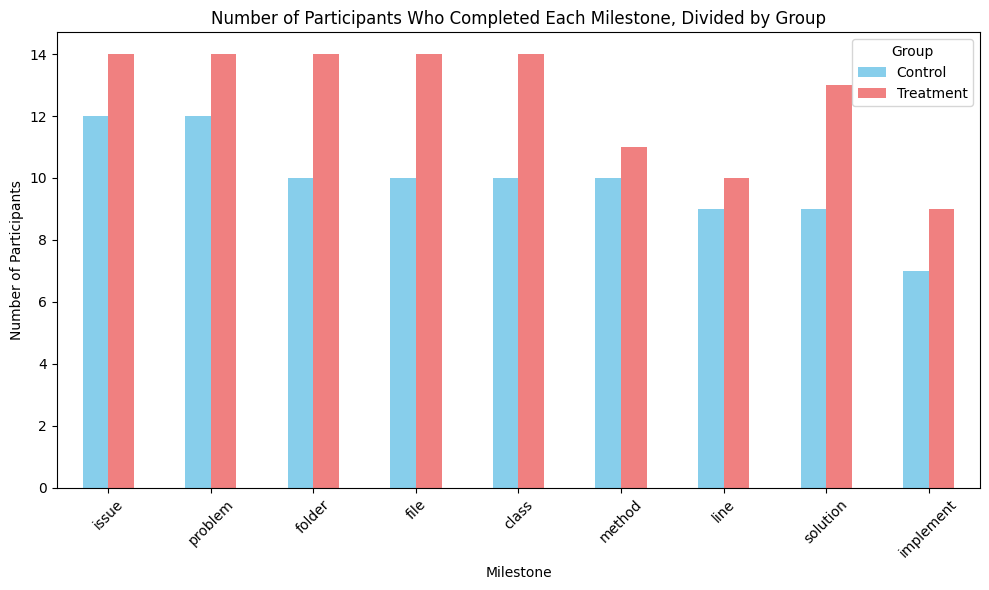

In [40]:
import matplotlib.pyplot as plt

# Count the number of participants who completed each milestone, grouped by group (ignoring NaN values)
completed_counts_by_group = df.groupby('group')[milestone_columns].apply(lambda x: x.notna().sum())

# Create a bar plot to visualize the number of participants who completed each milestone by group
completed_counts_by_group.T.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.title('Number of Participants Who Completed Each Milestone, Divided by Group')
plt.xlabel('Milestone')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Group', loc='upper right')
plt.tight_layout()

# Save the plot as PNG and PDF
plt.savefig('participants_completed_each_milestone_by_group.png', format='png')
plt.savefig('participants_completed_each_milestone_by_group.pdf', format='pdf')

# Show the plot
plt.show()


In [41]:
# Count the number of milestones completed by each participant (ignoring NaN values)
milestones_completed = df[milestone_columns].notna().sum(axis=1)

# Count how many participants completed each possible number of milestones (from 1 to 9)
milestones_distribution = milestones_completed.value_counts().sort_index()

# Display the distribution of participants by number of milestones completed
print(milestones_distribution)


2     2
5     1
6     3
7     1
8     3
9    16
dtype: int64


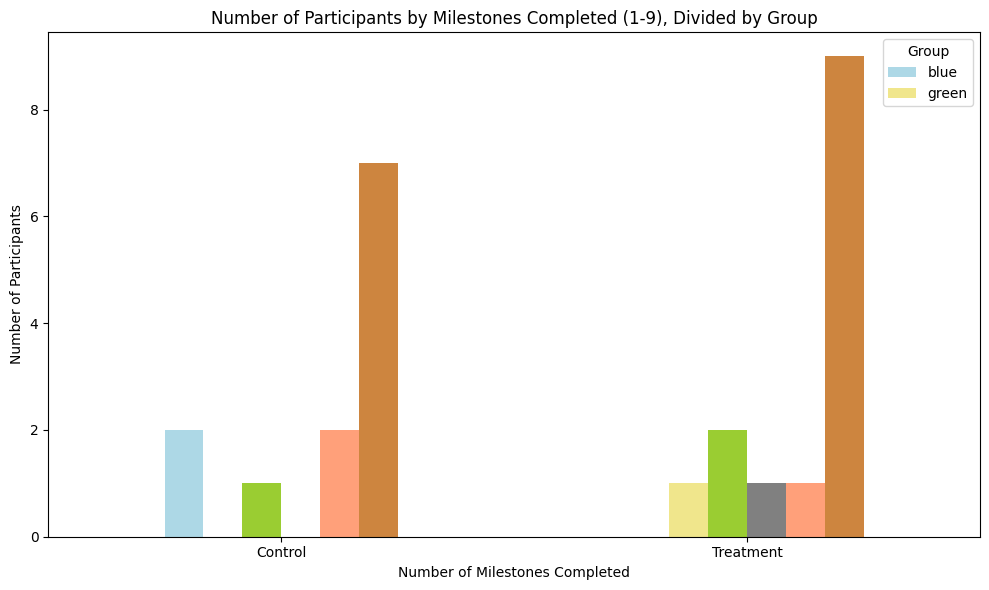

In [42]:
# Correcting the previous approach by simplifying the process

# Count the number of milestones completed by each participant, separated by group
df['milestones_completed'] = df[milestone_columns].notna().sum(axis=1)

# Group by both group and milestones completed, then count participants
grouped_distribution = df.groupby(['group', 'milestones_completed']).size().unstack(fill_value=0)
colors=['lightblue','khaki','yellowgreen','gray','lightsalmon','peru']
# Plotting the result
grouped_distribution.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Number of Participants by Milestones Completed (1-9), Divided by Group')
plt.xlabel('Number of Milestones Completed')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.legend(["blue", "green"], title='Group',  loc='upper right', )
plt.tight_layout()
plt.savefig('Number_Participants_Milestones_Completed_by_group.png', format='png')
plt.savefig('Number_Participants_Milestones_Completed_by_group.pdf', format='pdf')
# Show the plot
plt.show()


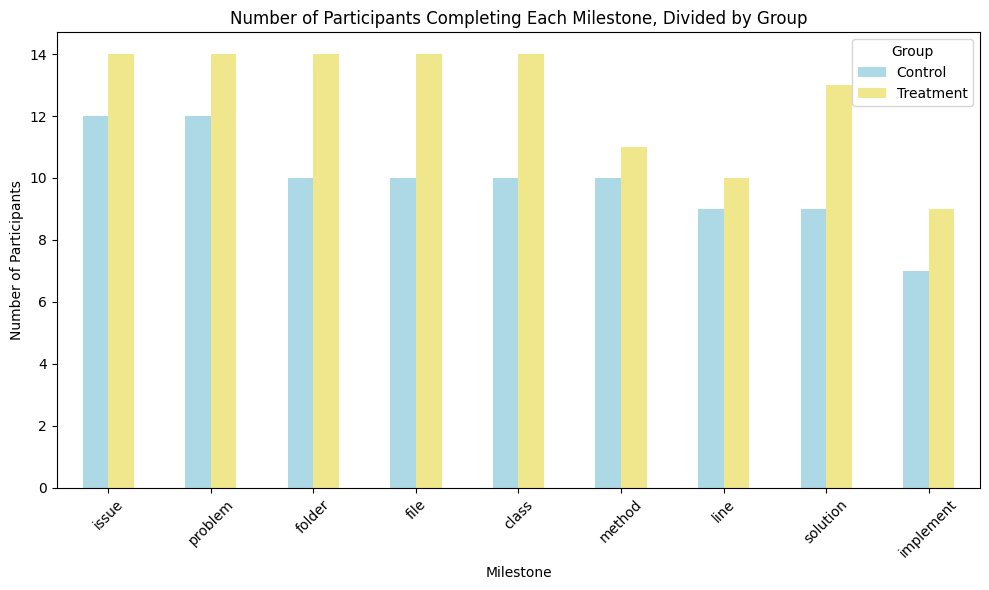

In [43]:
# Calculate the number of participants that completed each milestone, divided by group
milestone_counts_by_group = df.groupby('group')[milestone_columns].apply(lambda x: x.notna().sum())
colors = ['lightblue', 'khaki']
# Plotting the bar chart divided by group
milestone_counts_by_group.T.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Number of Participants Completing Each Milestone, Divided by Group')
plt.xlabel('Milestone')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Group', loc='upper right')
plt.tight_layout()
plt.savefig('Number_Participants_Completing_Milestones_by_group.png', format='png')
plt.savefig('Number_Participants_Completing_Milestones_by_group.pdf', format='pdf')
# Show the plot
plt.show()


In [44]:
# Calculate the total completion rates by group (i.e., how many milestones were completed out of all possible milestones)
total_milestones_possible = len(milestone_columns) * len(df)

# Sum the non-null values (completed milestones) for both groups
total_completion_by_group = df.groupby('group')[milestone_columns].apply(lambda x: x.notna().sum().sum())

# Calculate the completion rate as a percentage
completion_rate_by_group = (total_completion_by_group / total_milestones_possible) * 100

# Show the results
completion_rate_by_group


group
Control      38.034188
Treatment    48.290598
dtype: float64

In [45]:
# Filter the columns for the correct milestones where the value is 'y'
correct_milestone_counts_by_group_y = df.groupby('group')[correct_milestones_columns].apply(lambda x: (x == 'y').sum())
colors = ['lightblue', 'khaki']
# Plotting the updated bar chart divided by group
correct_milestone_counts_by_group_y.T.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Number of Correct Milestones Completed Divided by Group')
plt.xlabel('Correct Milestone')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Group', loc='upper right')
plt.tight_layout()
plt.savefig('Number_Correct_Milestones_Completed_by_group.png', format='png')
plt.savefig('Number_Correct_Milestones_Completed_by_group.pdf', format='pdf')
# Show the plot
plt.show()



NameError: name 'correct_milestones_columns' is not defined



Analyze correlation between experience and time.

Highlight differences in milestone completion patterns.



Analyze individual milestone completion per experience range.

Compare solution quality based on experience.


In [ ]:
# Define the relevant columns
correct_milestones_columns = ['right folder', 'right file', 'right class', 'right method', 'right lines', 'correct', 'sound solution']
time_columns = ['folder', 'file', 'class', 'method', 'line', 'solution']

# Ensure the YOE columns are numeric
df['Control YOE'] = pd.to_numeric(df['Control YOE'], errors='coerce')
df['Alt YOE'] = pd.to_numeric(df['Alt YOE'], errors='coerce')

# Map 'Control YOE' for Control group and 'Alt YOE' for Treatment group
df['Experience'] = df.apply(lambda row: row['Control YOE'] if row['group'] == 'Control' else row['Alt YOE'], axis=1)

# Mask correct milestones and use experience values
correct_experience_by_group = pd.DataFrame()
for correct_col in correct_milestones_columns:
    correct_experience_by_group[correct_col] = df['Experience'].where(df[correct_col] == 'y')
print(correct_experience_by_group)



   right folder  right file  right class  right method  right lines  correct  \
0           4.0         4.0          4.0           NaN          NaN      NaN   
1           7.0         7.0          7.0           7.0          7.0      7.0   
2           NaN         NaN          NaN           NaN          NaN      NaN   
3           NaN         NaN          NaN           NaN          NaN      NaN   
4           NaN         NaN          NaN           NaN          NaN      NaN   

   sound solution  
0             NaN  
1             7.0  
2             NaN  
3             9.0  
4             NaN  


In [53]:
# Calculate the average number of correct milestones per participant, grouped by group
correct_milestones_sum_by_group = df.groupby('group')[correct_milestones_columns].apply(lambda x: (x == 'y').sum().mean())
print(correct_milestones_sum_by_group.head())
# Calculate the average years of experience for participants who completed milestones correctly
avg_experience_for_correct_by_group = df.groupby('group').apply(lambda group: correct_experience_by_group.loc[group.index].mean())
print(avg_experience_for_correct_by_group.head())
# avg_experience_for_correct_by_group.head()
# Create a comparison DataFrame
comparison_correct_experience_df = pd.DataFrame({
    'Avg Correct Milestones': correct_milestones_sum_by_group,
    'Avg Experience for Correct': avg_experience_for_correct_by_group.mean(axis=1)
})
print(comparison_correct_experience_df.head())
colors = ['lightsalmon', 'silver']
# Plot the comparison
# comparison_correct_experience_df.plot(kind='bar', figsize=(10, 6), color=colors)

# plt.title('Correct Milestones vs. Experience for Correct by Group')
# plt.xlabel('Group')
# plt.ylabel('Average')
# plt.xticks(rotation=0)
# plt.legend(loc='upper right')
# plt.tight_layout()
# plt.savefig('Correct_Milestones_vs_Experience_for_Correct_by_Group.png', format='png')
# plt.savefig('Correct_Milestones_vs_Experience_for_Correct_by_Group.pdf', format='pdf')
# plt.show()

group
Control      3.714286
Treatment    6.000000
dtype: float64
           right folder  right file  right class  right method  right lines  \
group                                                                         
Control             7.5         7.5          7.5          11.0         11.0   
Treatment           6.0         6.0          6.0           6.0          6.0   

           correct  sound solution  
group                               
Control       11.0        5.666667  
Treatment      6.0        4.800000  
           Avg Correct Milestones  Avg Experience for Correct
group                                                        
Control                  3.714286                    8.738095
Treatment                6.000000                    5.828571


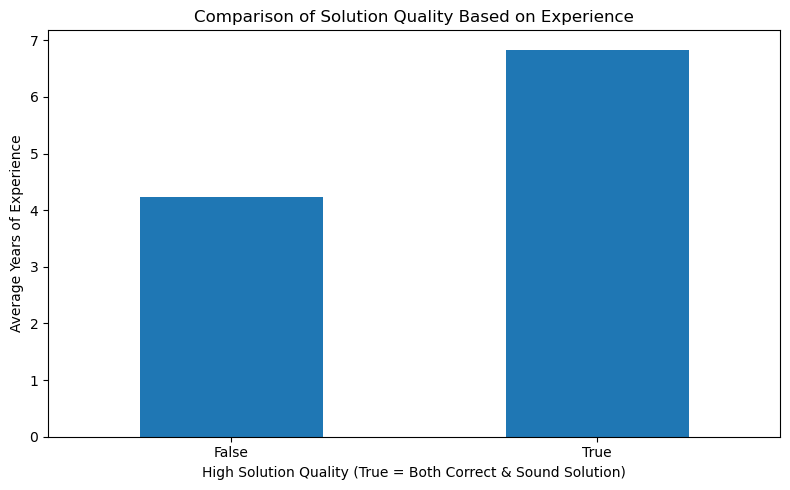

In [ ]:
# Create a new column indicating if both 'correct' and 'sound solution' are 'y' (high solution quality)
df['high_solution_quality'] = df.apply(lambda row: (row['correct'] == 'y') & (row['sound solution'] == 'y'), axis=1)

# Calculate the average experience for participants with high solution quality vs those without
avg_experience_solution_quality = df.groupby('high_solution_quality')['Experience'].mean()

# Plotting the result
avg_experience_solution_quality.plot(kind='bar', figsize=(8, 5))

plt.title('Comparison of Solution Quality Based on Experience')
plt.xlabel('High Solution Quality (True = Both Correct & Sound Solution)')
plt.ylabel('Average Years of Experience')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Ensure the contribution columns are numeric
df['Control Contribs'] = pd.to_numeric(df['Control Contribs'], errors='coerce')
df['Alt Contrib'] = pd.to_numeric(df['Alt Contrib'], errors='coerce')

# Map 'Control Contribs' for Control group and 'Alt Contrib' for Treatment group
df['Contributions'] = df.apply(lambda row: row['Control Contribs'] if row['group'] == 'Control' else row['Alt Contrib'], axis=1)

# Mask correct milestones and use contributions values
correct_contributions_by_group = pd.DataFrame()
for correct_col in correct_milestones_columns:
    correct_contributions_by_group[correct_col] = df['Contributions'].where(df[correct_col] == 'y')

# Calculate the average number of correct milestones per participant, grouped by group
correct_milestones_sum_by_group = df.groupby('group')[correct_milestones_columns].apply(lambda x: (x == 'y').sum().mean())

# Calculate the average contributions for participants who completed milestones correctly
avg_contrib_for_correct_by_group = df.groupby('group').apply(lambda group: correct_contributions_by_group.loc[group.index].mean())

# Creating a comparison DataFrame
comparison_correct_contrib_df = pd.DataFrame({
    'Avg Correct Milestones': correct_milestones_sum_by_group,
    'Avg Contributions for Correct': avg_contrib_for_correct_by_group.mean(axis=1)
})
print("comparison_correct_contrib_df", comparison_correct_contrib_df)
colors = ['lightsalmon', 'cornflowerblue']
# Plotting the result
comparison_correct_contrib_df.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Correct Milestones vs. Contributions for Correct by Group')
plt.xlabel('Group')
plt.ylabel('Average')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('Correct_Milestones_vs_Contributions_for_Correct_by_Group.png', format='png')
plt.savefig('Correct_Milestones_vs_Contributions_for_Correct_by_Group.pdf', format='pdf')
# Show the plot
plt.show()


NameError: name 'correct_milestones_columns' is not defined

In [ ]:
# Now we will calculate the average experience for each group, but only for participants who completed the milestone correctly ('y')


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_43164/242173790.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_experience_for_correct_by_group = df.groupby('group').apply(lambda group: correct_experience_by_group.loc[group.index].mean())


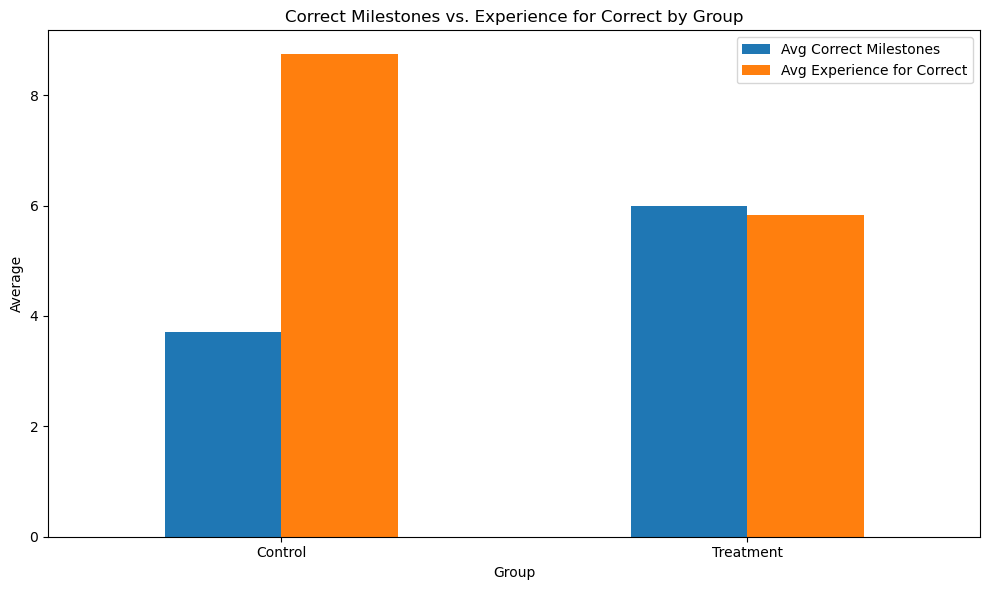

In [ ]:

# We will mask the correct milestones marked as 'y' and use the corresponding experience values
correct_experience_by_group = pd.DataFrame()
for correct_col in correct_milestones_columns:
    correct_experience_by_group[correct_col] = df['Experience'].where(df[correct_col] == 'y')

# Calculate the average number of correct milestones per participant, grouped by group
correct_milestones_sum_by_group = df.groupby('group')[correct_milestones_columns].apply(lambda x: (x == 'y').sum().mean())

# Calculate the average years of experience for each group based on correct milestones
avg_experience_for_correct_by_group = df.groupby('group').apply(lambda group: correct_experience_by_group.loc[group.index].mean())

# Creating a comparison DataFrame
comparison_correct_experience_df = pd.DataFrame({
    'Avg Correct Milestones': correct_milestones_sum_by_group,
    'Avg Experience for Correct': avg_experience_for_correct_by_group.mean(axis=1)  # Get the mean of experience for correct milestones
})

# Plotting the result
comparison_correct_experience_df.plot(kind='bar', figsize=(10, 6))

plt.title('Correct Milestones vs. Experience for Correct by Group')
plt.xlabel('Group')
plt.ylabel('Average')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# We will now calculate the average time taken to complete the correct milestones (those marked with 'y')
# First, we will filter the correct milestones based on 'y' and calculate the time taken for those

# Keeping the original milestone columns for time reference
time_columns = ['folder', 'file', 'class', 'method', 'line', 'solution']

# Combine the correct milestones and time columns to calculate average time only for correct milestones
correct_times_by_group = df.groupby('group').apply(
    lambda group: group.loc[group[correct_milestones_columns] == 'y', time_columns].mean()
)

# Plot the average times for correct milestones, divided by group
correct_times_by_group.T.plot(kind='bar', figsize=(10, 6))

plt.title('Average Time Taken for Correct Milestones, Divided by Group')
plt.xlabel('Milestone')
plt.ylabel('Average Time (Minutes)')
plt.xticks(rotation=45)
plt.legend(title='Group', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


KeyError: "None of [Index([          ('r', 'i', 'g', 'h', 't', ' ', 'f', 'o', 'l', 'd', 'e', 'r'),\n                           ('r', 'i', 'g', 'h', 't', ' ', 'f', 'i', 'l', 'e'),\n                      ('r', 'i', 'g', 'h', 't', ' ', 'c', 'l', 'a', 's', 's'),\n                 ('r', 'i', 'g', 'h', 't', ' ', 'm', 'e', 't', 'h', 'o', 'd'),\n                      ('r', 'i', 'g', 'h', 't', ' ', 'l', 'i', 'n', 'e', 's'),\n                                          ('c', 'o', 'r', 'r', 'e', 'c', 't'),\n       ('s', 'o', 'u', 'n', 'd', ' ', 's', 'o', 'l', 'u', 't', 'i', 'o', 'n')],\n      dtype='object')] are in the [index]"

/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_43164/3202281323.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  average_correct_time_by_group = df.groupby('group').apply(lambda group: correct_time_taken.loc[group.index].mean())


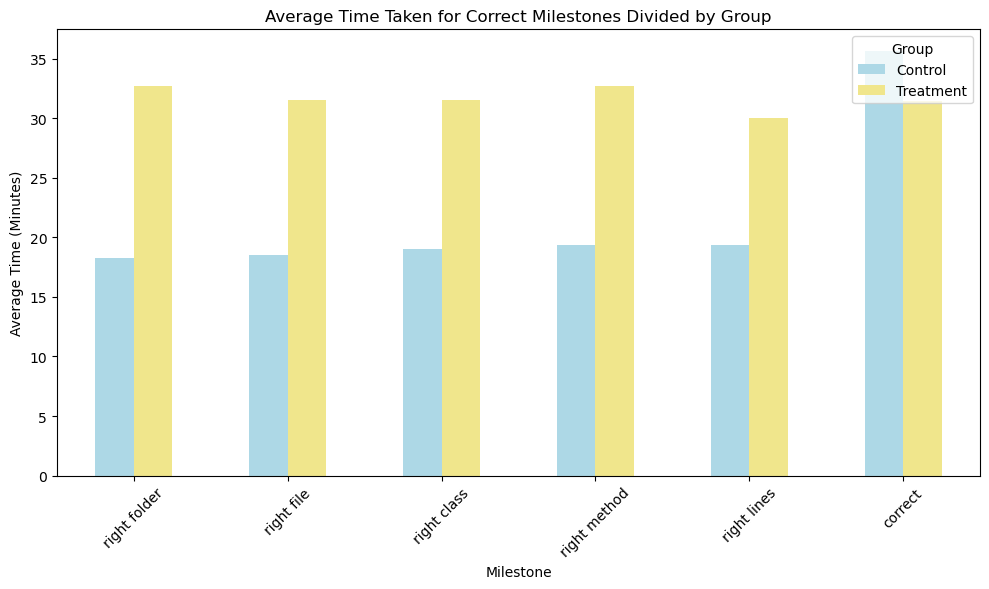

In [ ]:
# We will map the columns with 'y' as correct and use the corresponding time values for these columns.
# This is done by masking the 'y' values in the correct milestones and using the corresponding time values from the time columns.

# First, ensure the relevant time columns are numeric
df[time_columns] = df[time_columns].apply(pd.to_numeric, errors='coerce')

# Masking the correct milestones that are marked 'y' and selecting their corresponding time values
correct_time_taken = pd.DataFrame()
for correct_col, time_col in zip(correct_milestones_columns, time_columns):
    correct_time_taken[correct_col] = df[time_col].where(df[correct_col] == 'y')

# Now calculate the average time taken for the correct milestones, divided by group
average_correct_time_by_group = df.groupby('group').apply(lambda group: correct_time_taken.loc[group.index].mean())
colors=['lightblue','khaki']
# Plotting the result
average_correct_time_by_group.T.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Average Time Taken for Correct Milestones Divided by Group')
plt.xlabel('Milestone')
plt.ylabel('Average Time (Minutes)')
plt.xticks(rotation=45)
plt.legend(title='Group', loc='upper right')
plt.tight_layout()
plt.savefig('Average_Time_Taken_for_Correct_Milestones_by_Group.png', format='png')
plt.savefig('Average_Time_Taken_for_Correct_Milestones_by_Group.pdf', format='pdf')
# Show the plot
plt.show()


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_43164/354724693.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start'] = pd.to_datetime(df['start'], errors='coerce')


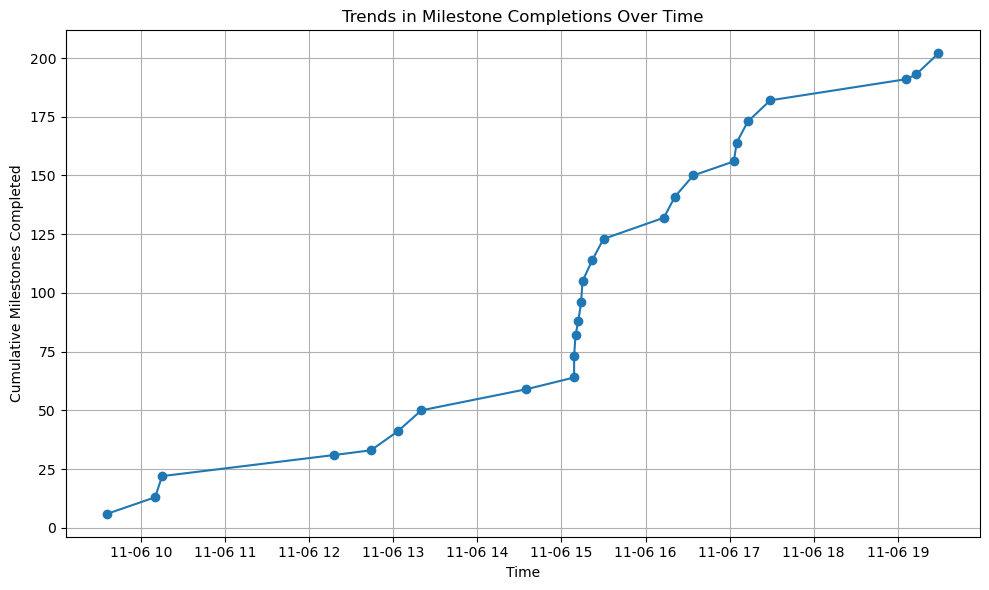

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume 'start' column contains the time when milestones were started or completed, convert to datetime
df['start'] = pd.to_datetime(df['start'], errors='coerce')

# Sort the dataframe by time
df = df.sort_values(by='start')

# Create a new column indicating how many milestones have been completed (based on not null values)
df['milestones_completed'] = df[milestone_columns].notna().sum(axis=1)

# Create a cumulative sum of milestones completed over time
df['cumulative_milestones'] = df['milestones_completed'].cumsum()

# Plotting the trends over time
plt.figure(figsize=(10, 6))
plt.plot(df['start'], df['cumulative_milestones'], marker='o')

plt.title('Trends in Milestone Completions Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Milestones Completed')
plt.grid(True)
plt.tight_layout()

# Save the plot in PNG and PDF formats
plt.savefig('milestone_trends_over_time.png', format='png')
plt.savefig('milestone_trends_over_time.pdf', format='pdf')

# Show the plot
plt.show()


completion_percentage            issue  problem      folder        file       class     method  \
group                                                                      
Control    100.0    100.0   83.333333   83.333333   83.333333  83.333333   
Treatment  100.0    100.0  100.000000  100.000000  100.000000  78.571429   

                line   solution  implement  
group                                       
Control    75.000000  75.000000  58.333333  
Treatment  71.428571  92.857143  64.285714  
average_completion_time               issue    problem     folder       file      class     method  \
group                                                                        
Control    9.750000  20.916667  29.800000  29.900000  31.700000  33.300000   
Treatment  5.357143  18.571429  35.285714  38.142857  38.357143  36.545455   

                line   solution  implement  
group                                       
Control    34.777778  42.444444  49.285714  
Treatment  35.900000 

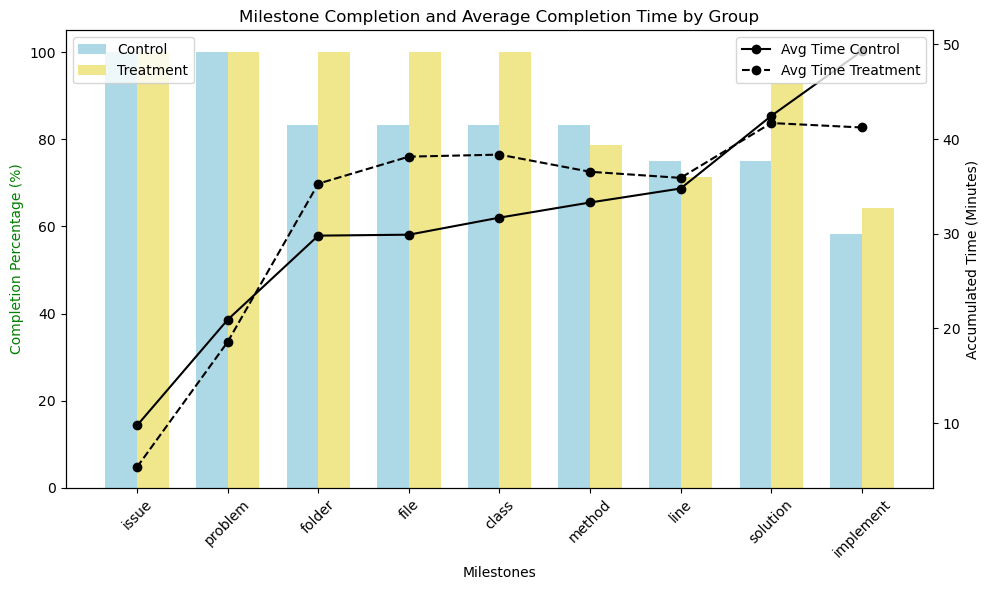

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your dataframe and 'milestone_columns' contains the list of milestones

# Define groups
groups = ['Control', 'Treatment']

# Calculate the percentage of participants who completed each milestone
completion_percentage = df.groupby('group')[milestone_columns].apply(lambda x: x.notna().mean() * 100)
print ('completion_percentage',completion_percentage)
# Calculate the average time to complete each milestone
average_completion_time = df.groupby('group')[milestone_columns].mean()
print ('average_completion_time', average_completion_time)
# Define milestones and positions for the plot
milestones = milestone_columns  # List of milestone names
x = np.arange(len(milestones))  # The label locations

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot completion percentage as stacked bars
bar_width = 0.35
control_bars = ax1.bar(x - bar_width / 2, completion_percentage.loc['Control'], bar_width, label='Control', color='lightblue')
treatment_bars = ax1.bar(x + bar_width / 2, completion_percentage.loc['Treatment'], bar_width, label='Treatment', color='khaki')#, hatch='/')

# Set up the second axis for average completion time
ax2 = ax1.twinx()
ax2.plot(x, average_completion_time.loc['Control'], 'ko-', label='Avg Time Control')
ax2.plot(x, average_completion_time.loc['Treatment'], 'ko--', label='Avg Time Treatment')

# Labels, titles, and legends
ax1.set_xlabel('Milestones')
ax1.set_ylabel('Completion Percentage (%)', color='green')
ax2.set_ylabel('Accumulated Time (Minutes)', color='black')
ax1.set_title('Milestone Completion and Average Completion Time by Group')
ax1.set_xticks(x)
ax1.set_xticklabels(milestones, rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()

# Save the plot
plt.savefig('milestone_completion_average_time.png', format='png')
plt.savefig('milestone_completion_average_time.pdf', format='pdf')

# Show the plot
plt.show()


correctness_percentage            right folder  right file  right class  right method  right lines  \
group                                                                         
Control       33.333333   33.333333    33.333333     25.000000    25.000000   
Treatment     42.857143   35.714286    35.714286     35.714286    35.714286   

           sound solution    correct  
group                                 
Control         41.666667  25.000000  
Treatment       78.571429  35.714286  
correct_time_taken               folder       file      class     method       line   solution  \
group                                                                         
Control    29.800000  29.900000  31.700000  33.300000  34.777778  42.444444   
Treatment  35.285714  38.142857  38.357143  36.545455  35.900000  41.692308   

           implement  
group                 
Control    49.285714  
Treatment  41.222222  
x [0 1 2 3 4 5 6]


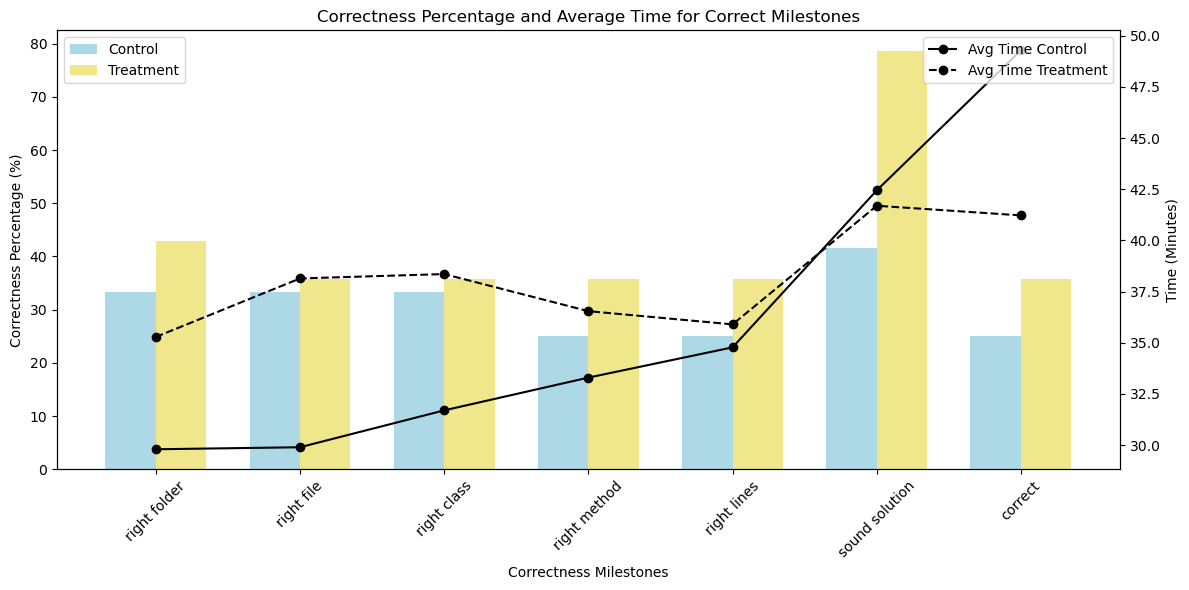

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the correctness columns
correctness_columns = ['right folder', 'right file', 'right class', 'right method', 'right lines', 'sound solution', 'correct']
time_columns = ['folder', 'file', 'class', 'method', 'line', 'solution', 'implement']

# Calculate the average correctness percentage for each group
correctness_percentage = df.groupby('group')[correctness_columns].apply(lambda x: (x == 'y').mean() * 100)

print('correctness_percentage', correctness_percentage)
# Calculate the average time taken for correct completions
correct_time_taken = df.groupby('group')[time_columns].mean()
print('correct_time_taken', correct_time_taken)
# Plot template
milestones = correctness_columns
x = np.arange(len(milestones))  # Label locations
print('x',x)
width = 0.35  # Bar width

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the completion percentages as stacked bars
bars1 = ax1.bar(x - width/2, correctness_percentage.loc['Control'], width, label='Control', color='lightblue')
bars2 = ax1.bar(x + width/2, correctness_percentage.loc['Treatment'], width, label='Treatment', color='khaki')#, hatch='/')

# Set up secondary y-axis for average time
ax2 = ax1.twinx()
ax2.plot(x, correct_time_taken.loc['Control'], 'ko-', label='Avg Time Control')
ax2.plot(x, correct_time_taken.loc['Treatment'], 'ko--', label='Avg Time Treatment')

# Title, labels, and ticks
ax1.set_xlabel('Correctness Milestones')
ax1.set_ylabel('Correctness Percentage (%)')
ax2.set_ylabel('Time (Minutes)')
ax1.set_title('Correctness Percentage and Average Time for Correct Milestones')
ax1.set_xticks(x)
ax1.set_xticklabels(milestones, rotation=45)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()

# Save the plot as PNG and PDF
plt.savefig('correctness_percentage_time_by_group.png', format='png')
plt.savefig('correctness_percentage_time_by_group.pdf', format='pdf')

# Show the plot
plt.show()


 correctness_percentage            right folder  right file  right class  right method  right lines  \
group                                                                         
Control       30.769231   38.461538    30.769231     23.076923    23.076923   
Treatment     42.857143   35.714286    35.714286     35.714286    35.714286   

           sound solution    correct  
group                                 
Control         46.153846  30.769231  
Treatment       78.571429  35.714286  
average_correct_times {'folder': group
Control      18.250000
Treatment    31.833333
Name: folder, dtype: float64, 'file': group
Control      20.2
Treatment    29.0
Name: file, dtype: float64, 'class': group
Control      19.0
Treatment    29.0
Name: class, dtype: float64, 'method': group
Control      19.333333
Treatment    29.800000
Name: method, dtype: float64, 'line': group
Control      19.333333
Treatment    30.000000
Name: line, dtype: float64, 'solution': group
Control      44.500000
Treatment

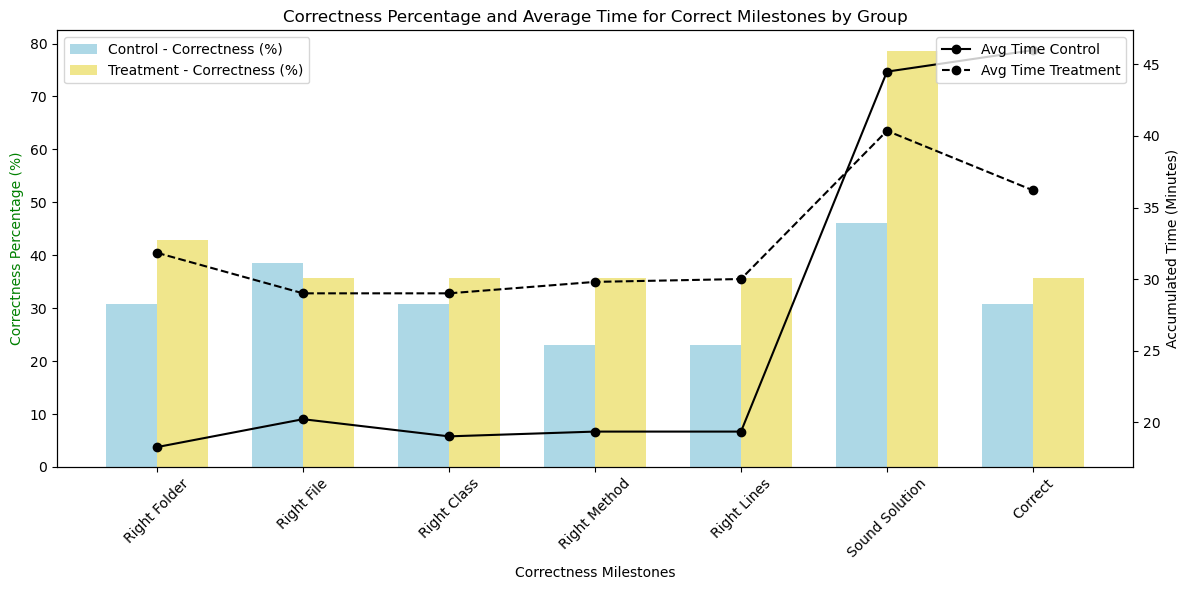

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = './data/Milestones - timesStandard-prod-Nov24.csv'  # Replace with the correct file path
df = pd.read_csv(file_path)

# Define the correctness and time columns
correctness_columns = ['right folder', 'right file', 'right class', 'right method', 'right lines', 'sound solution', 'correct']
time_columns = ['folder', 'file', 'class', 'method', 'line', 'solution', 'implement']

# Calculate the average correctness percentage for each group
correctness_percentage = df.groupby('group')[correctness_columns].apply(lambda x: (x == 'y').mean() * 100)

print (' correctness_percentage', correctness_percentage)
# Calculate the average time taken for correct completions
average_correct_times = {}
for correct_col, time_col in zip(correctness_columns, time_columns):
    average_correct_times[time_col] = df[df[correct_col] == 'y'].groupby('group')[time_col].mean()

print('average_correct_times', average_correct_times)
# Convert the average correct times to a DataFrame for easier plotting
average_correct_times_df = pd.DataFrame(average_correct_times)

# Define milestones and positions for the plot
milestones = correctness_columns
x = np.arange(len(milestones))  # The label locations
width = 0.35  # Bar width

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot correctness percentage as grouped bars
bars1 = ax1.bar(x - width/2, correctness_percentage.loc['Control'], width, label='Control - Correctness (%)', color='lightblue')
bars2 = ax1.bar(x + width/2, correctness_percentage.loc['Treatment'], width, label='Treatment - Correctness (%)', color='khaki') #, hatch='/')

# Set up secondary y-axis for average time
ax2 = ax1.twinx()
ax2.plot(x, average_correct_times_df.loc['Control'], 'ko-', label='Avg Time Control')
ax2.plot(x, average_correct_times_df.loc['Treatment'], 'ko--', label='Avg Time Treatment')

# Labels, titles, and ticks
ax1.set_xlabel('Correctness Milestones')
ax1.set_ylabel('Correctness Percentage (%)', color='green')
ax2.set_ylabel('Accumulated Time (Minutes)', color='black')
ax1.set_title('Correctness Percentage and Average Time for Correct Milestones by Group')
ax1.set_xticks(x)
ax1.set_xticklabels(['Right Folder', 'Right File', 'Right Class', 'Right Method', 'Right Lines', 'Sound Solution', 'Correct'], rotation=45)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()

# Save the plot as PNG and PDF
plt.savefig('correctness_percentage_time_by_group.png', format='png')
plt.savefig('correctness_percentage_time_by_group.pdf', format='pdf')
# Show the plot
plt.show()


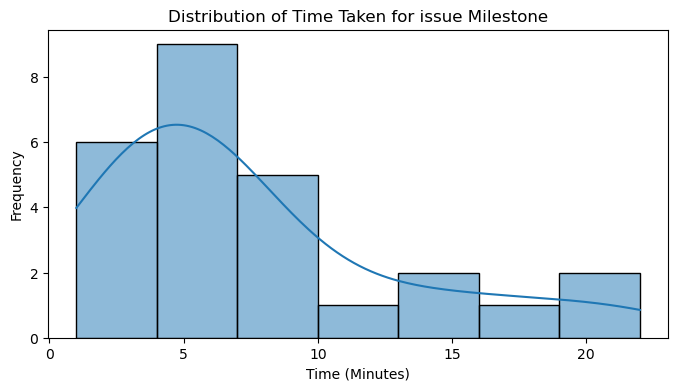

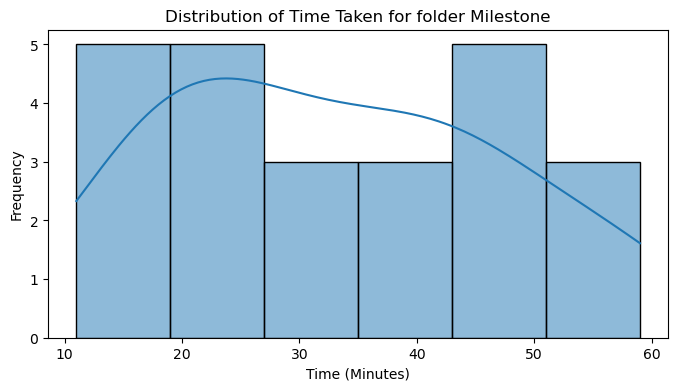

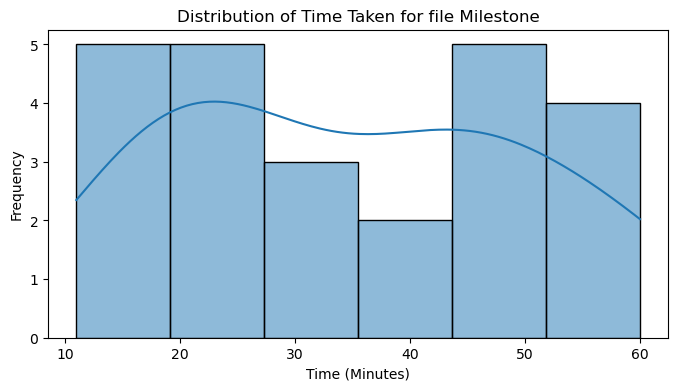

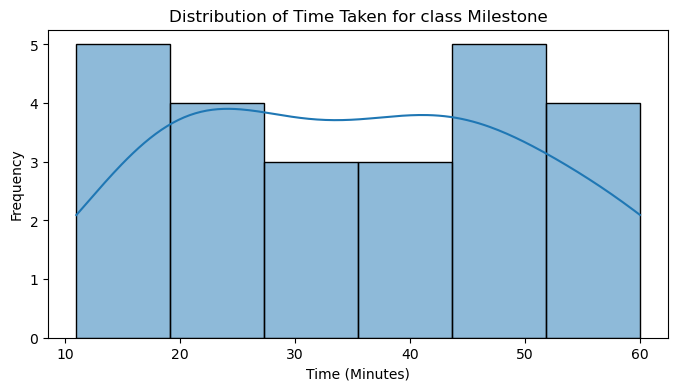

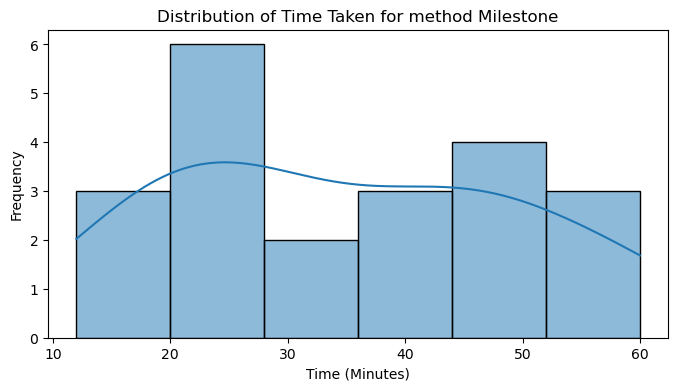

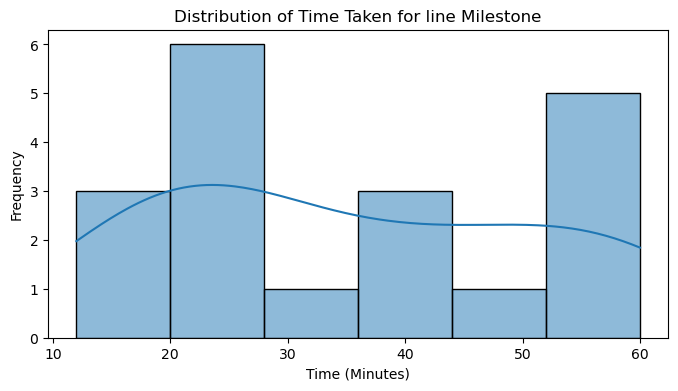

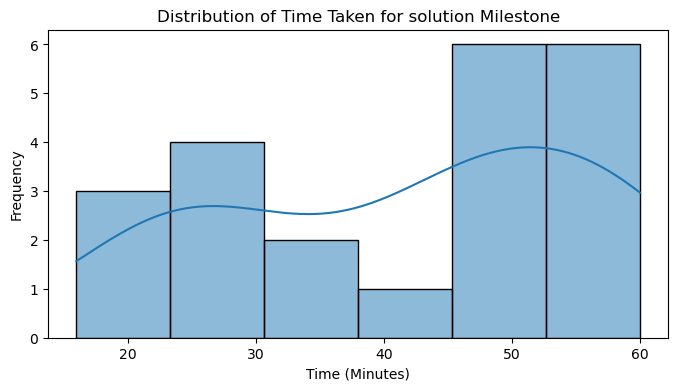

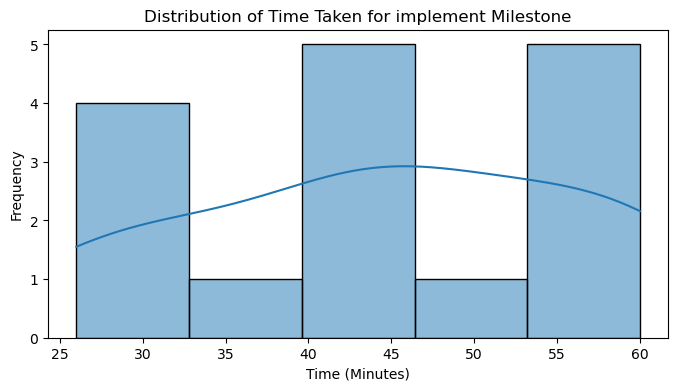

Shapiro-Wilk Test for Normality (p-values):
issue: p-value = 0.0014059653005920024
folder: p-value = 0.27858947861991573
file: p-value = 0.1399627482488777
class: p-value = 0.21016296047564229
method: p-value = 0.29242715280157566
line: p-value = 0.10898903080678088
solution: p-value = 0.035173189105848955
implement: p-value = 0.17702289897834914


In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Define the time columns for milestones
time_columns = ['issue', 'folder', 'file', 'class', 'method', 'line', 'solution', 'implement']

# Plot histograms with KDE for each milestone's completion time to visually inspect the distribution
for time_col in time_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[time_col].dropna(), kde=True)
    plt.title(f'Distribution of Time Taken for {time_col} Milestone')
    plt.xlabel('Time (Minutes)')
    plt.ylabel('Frequency')
    plt.show()

# Perform Shapiro-Wilk test for normality for each time column
normality_results = {}
for time_col in time_columns:
    stat, p_value = stats.shapiro(df[time_col].dropna())
    normality_results[time_col] = p_value

# Display the results of the Shapiro-Wilk test
print("Shapiro-Wilk Test for Normality (p-values):")
for time_col, p_value in normality_results.items():
    print(f"{time_col}: p-value = {p_value}")


In [ ]:
!pip install cliffs_delta

In [ ]:
from scipy import stats

import cliffs_delta

# Define the time columns for milestones
time_columns = ['issue', 'folder', 'file', 'class', 'method', 'line', 'solution', 'implement']

# Initialize dictionaries to store results
mann_whitney_results = {}
cliffs_delta_results = {}

# Perform Mann-Whitney U test and Cliff's Delta for each milestone
for time_col in time_columns:
    control_times = df[df['group'] == 'Control'][time_col].dropna()
    treatment_times = df[df['group'] == 'Treatment'][time_col].dropna()
    
    # Mann-Whitney U test
    u_stat, p_value = stats.mannwhitneyu(control_times, treatment_times)
    mann_whitney_results[time_col] = p_value
    
    # Cliff's Delta
    delta, size = cliffs_delta.cliffs_delta(control_times, treatment_times)
    cliffs_delta_results[time_col] = (delta, size)

# Display the results of Mann-Whitney U test and Cliff's Delta
print("Mann-Whitney U Test Results (p-values):")
for time_col, p_value in mann_whitney_results.items():
    print(f"{time_col}: p-value = {p_value}")

print("\nCliff's Delta Effect Size Results:")
for time_col, (delta, size) in cliffs_delta_results.items():
    print(f"{time_col}: Delta = {delta}, Effect size = {size}")


Mann-Whitney U Test Results (p-values):
issue: p-value = 0.016158804241664184
folder: p-value = 0.2906337441398318
file: p-value = 0.207369665760873
class: p-value = 0.29137064186936934
method: p-value = 0.5490823101521527
line: p-value = 0.8063293529908055
solution: p-value = 0.6879119582968585
implement: p-value = 0.24078755709236277

Cliff's Delta Effect Size Results:
issue: Delta = 0.5595238095238095, Effect size = large
folder: Delta = -0.2642857142857143, Effect size = small
file: Delta = -0.3142857142857143, Effect size = small
class: Delta = -0.2642857142857143, Effect size = small
method: Delta = -0.16363636363636364, Effect size = small
line: Delta = -0.07777777777777778, Effect size = negligible
solution: Delta = 0.1111111111111111, Effect size = negligible
implement: Delta = 0.36507936507936506, Effect size = medium


In [ ]:
from scipy import stats
import cliffs_delta

# Define the correctness columns and corresponding time columns
correctness_columns = ['right folder', 'right file', 'right class', 'right method', 'right lines', 'correct', 'sound solution']
time_columns = ['folder', 'file', 'class', 'method', 'line', 'solution']

# Initialize dictionaries to store results for correct milestones
mann_whitney_results_correct = {}
cliffs_delta_results_correct = {}

# Perform Mann-Whitney U test and Cliff's Delta for each milestone but only for participants who completed the milestone correctly
for correct_col, time_col in zip(correctness_columns, time_columns):
    control_times_correct = df[(df['group'] == 'Control') & (df[correct_col] == 'y')][time_col].dropna()
    treatment_times_correct = df[(df['group'] == 'Treatment') & (df[correct_col] == 'y')][time_col].dropna()
    
    # Mann-Whitney U test
    u_stat, p_value = stats.mannwhitneyu(control_times_correct, treatment_times_correct)
    mann_whitney_results_correct[time_col] = p_value
    
    # Cliff's Delta
    delta, size = cliffs_delta.cliffs_delta(control_times_correct, treatment_times_correct)
    cliffs_delta_results_correct[time_col] = (delta, size)

# Display the results of Mann-Whitney U test and Cliff's Delta for correct milestones
print("Mann-Whitney U Test Results for Correct Milestones (p-values):")
for time_col, p_value in mann_whitney_results_correct.items():
    print(f"{time_col}: p-value = {p_value}")

print("\nCliff's Delta Effect Size Results for Correct Milestones:")
for time_col, (delta, size) in cliffs_delta_results_correct.items():
    print(f"{time_col}: Delta = {delta}, Effect size = {size}")


Mann-Whitney U Test Results for Correct Milestones (p-values):
folder: p-value = 0.10316404004024063
file: p-value = 0.08649016622437304
class: p-value = 0.1659764870300503
method: p-value = 0.2571428571428571
line: p-value = 0.4126984126984127
solution: p-value = 1.0

Cliff's Delta Effect Size Results for Correct Milestones:
folder: Delta = -0.6, Effect size = large
file: Delta = -0.6285714285714286, Effect size = large
class: Delta = -0.5142857142857142, Effect size = large
method: Delta = -0.5, Effect size = large
line: Delta = -0.4, Effect size = medium
solution: Delta = 0.05555555555555555, Effect size = negligible


In [ ]:
from statsmodels.stats.contingency_tables import Table2x2
import numpy as np

# Define the correctness columns
correctness_columns = ['right folder', 'right file', 'right class', 'right method', 'right lines', 'correct', 'sound solution']

# Initialize dictionary to store the odds ratio results
odds_ratio_results = {}

# Perform Odds Ratio calculation for each milestone comparing correctness with years of experience
for correct_col in correctness_columns:
    # Create binary arrays: 1 if correct ('y'), 0 otherwise
    control_correct = (df[(df['group'] == 'Control')][correct_col] == 'y').astype(int)
    treatment_correct = (df[(df['group'] == 'Treatment')][correct_col] == 'y').astype(int)

    # Create binary arrays for experience: 1 if YOE >= average YOE, 0 otherwise
    avg_control_yoe = df['Control YOE'].mean()
    avg_treatment_yoe = df['Alt YOE'].mean()
    
    control_experience = (df[(df['group'] == 'Control')]['Control YOE'] >= avg_control_yoe).astype(int)
    treatment_experience = (df[(df['group'] == 'Treatment')]['Alt YOE'] >= avg_treatment_yoe).astype(int)

    # Build contingency table for Control group
    contingency_table_control = np.array([
        [(control_correct & control_experience).sum(), (control_correct & ~control_experience).sum()],
        [(~control_correct & control_experience).sum(), (~control_correct & ~control_experience).sum()]
    ])
    
    # Build contingency table for Treatment group
    contingency_table_treatment = np.array([
        [(treatment_correct & treatment_experience).sum(), (treatment_correct & ~treatment_experience).sum()],
        [(~treatment_correct & treatment_experience).sum(), (~treatment_correct & ~treatment_experience).sum()]
    ])
    
    # Calculate Odds Ratio for Control group
    table_control = Table2x2(contingency_table_control)
    odds_ratio_control = table_control.oddsratio
    
    # Calculate Odds Ratio for Treatment group
    table_treatment = Table2x2(contingency_table_treatment)
    odds_ratio_treatment = table_treatment.oddsratio

    # Store the results
    odds_ratio_results[correct_col] = {
        'Control Odds Ratio': odds_ratio_control,
        'Treatment Odds Ratio': odds_ratio_treatment
    }

# Display the results
for milestone, odds in odds_ratio_results.items():
    print(f"{milestone} - Control Odds Ratio: {odds['Control Odds Ratio']}, Treatment Odds Ratio: {odds['Treatment Odds Ratio']}")


right folder - Control Odds Ratio: -5.0, Treatment Odds Ratio: -29.333333333333332
right file - Control Odds Ratio: -5.0, Treatment Odds Ratio: -29.333333333333332
right class - Control Odds Ratio: -5.0, Treatment Odds Ratio: -29.333333333333332
right method - Control Odds Ratio: -1.6666666666666667, Treatment Odds Ratio: -29.333333333333332
right lines - Control Odds Ratio: -1.6666666666666667, Treatment Odds Ratio: -29.333333333333332
correct - Control Odds Ratio: -3.0, Treatment Odds Ratio: -11.0
sound solution - Control Odds Ratio: -6.333333333333333, Treatment Odds Ratio: -4.666666666666667


In [ ]:
from statsmodels.stats.contingency_tables import Table2x2
import numpy as np

# Define the correctness columns (all correct milestones)
correctness_columns = ['right folder', 'right file', 'right class', 'right method', 'right lines', 'correct', 'sound solution']

# Initialize dictionary to store the odds ratio results
odds_ratio_results = {}

# Calculate the total number of correct milestones for each participant
df['total_correct_milestones'] = df[correctness_columns].apply(lambda x: (x == 'y').sum(), axis=1)

# Calculate average years of experience for each group
avg_control_yoe = df['Control YOE'].mean()
avg_treatment_yoe = df['Alt YOE'].mean()

# Create binary arrays for experience: 1 if YOE >= average YOE, 0 otherwise
control_experience = (df[(df['group'] == 'Control')]['Control YOE'] >= avg_control_yoe).astype(int)
treatment_experience = (df[(df['group'] == 'Treatment')]['Alt YOE'] >= avg_treatment_yoe).astype(int)

# Create binary arrays for correct milestones: 1 if participant has completed more than average number of milestones correctly
avg_control_correct = df[df['group'] == 'Control']['total_correct_milestones'].mean()
avg_treatment_correct = df[df['group'] == 'Treatment']['total_correct_milestones'].mean()

control_correct = (df[(df['group'] == 'Control')]['total_correct_milestones'] >= avg_control_correct).astype(int)
treatment_correct = (df[(df['group'] == 'Treatment')]['total_correct_milestones'] >= avg_treatment_correct).astype(int)

# Build contingency table for Control group
contingency_table_control = np.array([
    [(control_correct & control_experience).sum(), (control_correct & ~control_experience).sum()],
    [(~control_correct & control_experience).sum(), (~control_correct & ~control_experience).sum()]
])

# Build contingency table for Treatment group
contingency_table_treatment = np.array([
    [(treatment_correct & treatment_experience).sum(), (treatment_correct & ~treatment_experience).sum()],
    [(~treatment_correct & treatment_experience).sum(), (~treatment_correct & ~treatment_experience).sum()]
])

# Calculate Odds Ratio for Control group
table_control = Table2x2(contingency_table_control)
odds_ratio_control = table_control.oddsratio

# Calculate Odds Ratio for Treatment group
table_treatment = Table2x2(contingency_table_treatment)
odds_ratio_treatment = table_treatment.oddsratio

# Store and display the results
odds_ratio_results = {
    'Control Odds Ratio': odds_ratio_control,
    'Treatment Odds Ratio': odds_ratio_treatment
}

print(odds_ratio_results)


{'Control Odds Ratio': -5.0, 'Treatment Odds Ratio': -29.333333333333332}


In [ ]:
 # Count how many correct and incorrect milestones we have in the Treatment and Control groups

# Define the correctness columns (all correct milestones)
correctness_columns = ['right folder', 'right file', 'right class', 'right method', 'right lines', 'correct', 'sound solution']

# Initialize dictionary to store the results
correct_incorrect_counts = {}

# Calculate the number of correct milestones (marked as 'y') and incorrect milestones for each group
for group in ['Control', 'Treatment']:
    # Correct milestones
    correct_milestones = (df[df['group'] == group][correctness_columns] == 'y').sum().sum()
    # Incorrect milestones
    incorrect_milestones = (df[df['group'] == group][correctness_columns] != 'y').sum().sum()
    
    # Store the results
    correct_incorrect_counts[group] = {
        'Correct Milestones': correct_milestones,
        'Incorrect Milestones': incorrect_milestones
    }

# Display the counts
for group, counts in correct_incorrect_counts.items():
    print(f"{group} Group - Correct Milestones: {counts['Correct Milestones']}, Incorrect Milestones: {counts['Incorrect Milestones']}")


Control Group - Correct Milestones: 36, Incorrect Milestones: 48
Treatment Group - Correct Milestones: 53, Incorrect Milestones: 45


            Treatment, Control
Correct     53, 36
Incorrect   45, 48

In [ ]:
from scipy.stats.contingency import odds_ratio
res = odds_ratio([[53, 36], [45, 48]])
res.statistic



1.5664502521782766

In [ ]:
res.confidence_interval(confidence_level=0.95)

ConfidenceInterval(low=0.8379743580840621, high=2.9473163282107007)

In [ ]:
# Define the correctness columns (all correct milestones)
correctness_columns = ['right folder', 'right file', 'right class', 'right method', 'right lines', 'correct', 'sound solution']

# Initialize dictionary to store the results
average_correct_incorrect_counts = {}

# Calculate the average number of correct and incorrect milestones per participant for each group
for group in ['Control', 'Treatment']:
    # Correct milestones
    avg_correct_milestones = (df[df['group'] == group][correctness_columns] == 'y').mean().mean()
    # Incorrect milestones
    avg_incorrect_milestones = (df[df['group'] == group][correctness_columns] != 'y').mean().mean()
    
    # Store the results
    average_correct_incorrect_counts[group] = {
        'Average Correct Milestones': avg_correct_milestones,
        'Average Incorrect Milestones': avg_incorrect_milestones
    }

# Display the results
print("Average Correct and Incorrect Milestones by Group:")
for group, counts in average_correct_incorrect_counts.items():
    print(f"{group} - Correct: {counts['Average Correct Milestones']:.2f}, Incorrect: {counts['Average Incorrect Milestones']:.2f}")


Average Correct and Incorrect Milestones by Group:
Control - Correct: 0.43, Incorrect: 0.57
Treatment - Correct: 0.54, Incorrect: 0.46


            Treatment, Control
Correct     54, 43
Incorrect   46, 47

In [ ]:
from scipy.stats.contingency import odds_ratio
res = odds_ratio([[54, 43], [46, 47]])
res.statistic

1.281427295429083

In [ ]:
res.confidence_interval(confidence_level=0.95)

ConfidenceInterval(low=0.6971354258799745, high=2.36280456409148)

comparison_correct_contrib_df            Avg Correct Milestones  Avg Contributions for Correct
group                                                           
Control                  5.142857                       9.003571
Treatment                7.571429                       0.678571

In [ ]:
from scipy.stats.contingency import odds_ratio
res = odds_ratio([[514,   900], [757 ,68]])
res.statistic

0.05137491923476183

In [ ]:
res.confidence_interval(confidence_level=0.95)

ConfidenceInterval(low=0.038579746718966364, high=0.06757568858725284)